# ***GD MLR CCPP Dataset***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('ccpp.csv')  # Replace with your dataset path

# Separate features and target variable
X = data.drop(columns=['PE'])
y = data['PE']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Descent for Multiple Linear Regression
class GradientDescentRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialize parameters
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        # Gradient Descent
        for _ in range(self.n_iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (1/m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        return X.dot(self.theta)

# Initialize and train the model
model = GradientDescentRegressor(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 206233.9894
Root Mean Squared Error: 454.1299
Mean Absolute Error: 454.1069
R-squared: -719.7347


# ***GD KNN TITANIC Dataset***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('titanic.csv')  # Replace with your dataset path

# Prepare the data
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Separate features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        # Gradient Descent
        for _ in range(self.n_iterations):
            predictions = self.sigmoid(X.dot(self.theta))
            errors = y - predictions
            gradient = (1/m) * X.T.dot(errors)
            self.theta += self.learning_rate * gradient

    def predict(self, X):
        probabilities = self.sigmoid(X.dot(self.theta))
        return np.round(probabilities)

# Initialize and train the model
model = LogisticRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7821
Confusion Matrix:
[[80 25]
 [14 60]]


# ***GD SLR Salary_Data Dataset***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Salary_Data.csv')  # Replace with your dataset path

X = data[['YearsExperience']]
y = data['Salary']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
class SimpleLinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialize parameters
        self.theta = np.zeros(X.shape[1])
        self.b = 0
        m = len(y)

        # Gradient Descent
        for _ in range(self.n_iterations):
            predictions = X.dot(self.theta) + self.b
            errors = predictions - y
            gradient_theta = (1/m) * X.T.dot(errors)
            gradient_b = (1/m) * np.sum(errors)
            self.theta -= self.learning_rate * gradient_theta
            self.b -= self.learning_rate * gradient_b

    def predict(self, X):
        return X.dot(self.theta) + self.b

# Initialize and train the model
model = SimpleLinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 49850777.5196
Root Mean Squared Error: 7060.5083
R-squared: 0.9024


# ***Updated MLR using GD***

Final parameters (weights): [454.3453939  -11.92999156  -5.0358013    0.90905179  -1.38360079]
Mean Squared Error (MSE): 22.1300
Root Mean Squared Error (RMSE): 4.7043
Mean Absolute Error (MAE): 3.7460
R-squared (R2): 0.9240


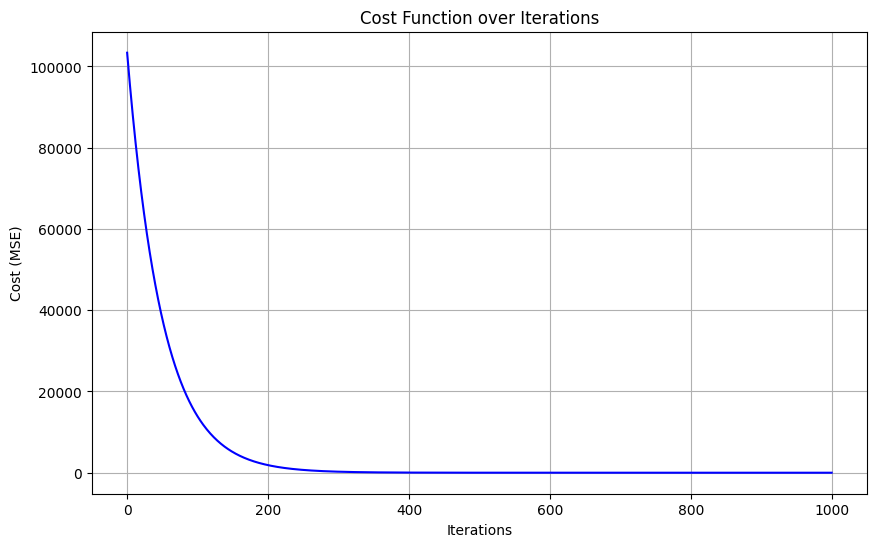

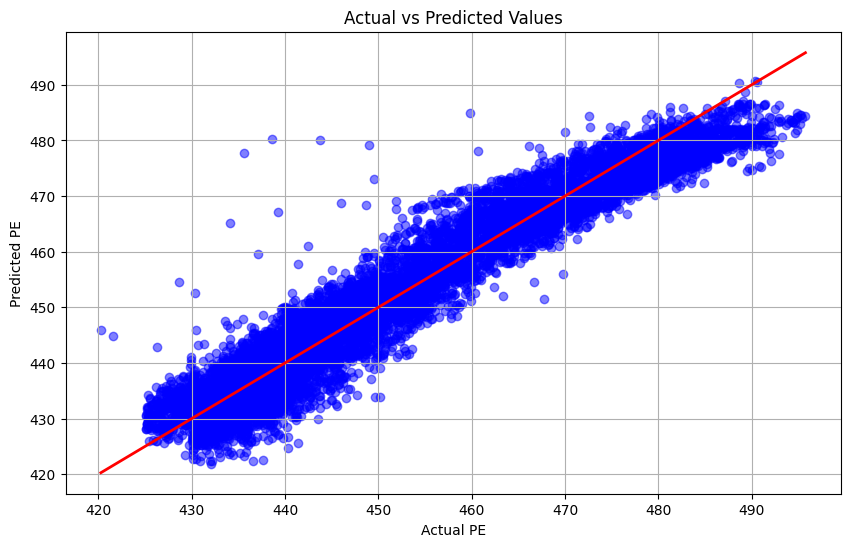

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('ccpp.csv')  # Replace with your dataset path

# Separate features and target variable
X = data.drop(columns=['PE'])
y = data['PE']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters (weights)
theta = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Store cost history for plotting
cost_history = []

# Gradient Descent
for i in range(iterations):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = np.sum(errors ** 2) / (2 * len(y))
    cost_history.append(cost)

    gradient = X.T.dot(errors) / len(y)
    theta -= learning_rate * gradient

# Predictions using the final model
y_pred = X.dot(theta)

# Performance Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the final parameters (weights) and performance metrics
print("Final parameters (weights):", theta)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

# Plotting the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.grid(True)
plt.show()


# ***Updated SLR using GD***

m = 12467.68, c = 2394.56
Mean Squared Error: 162145615.19
R^2 Score: 0.68


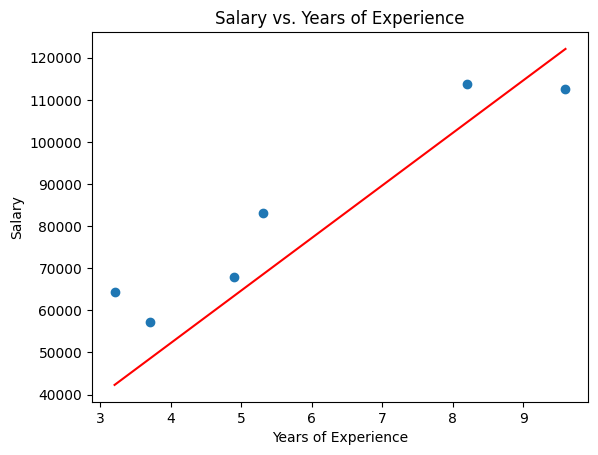

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Salary_Data.csv')  # Replace with your dataset path

X = data['YearsExperience']
y = data['Salary']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 500  # The number of iterations to perform gradient descent

n = float(len(X_train))  # Number of elements in X_train

# Performing Gradient Descent on the training set
for i in range(epochs):
    Y_pred = m*X_train + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X_train * (y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print(f'm = {m:.2f}, c = {c:.2f}')

# Predicting on the test set
Y_pred_test = m*X_test + c

# Performance Metrics on the test set
mse = mean_squared_error(y_test, Y_pred_test)
r2 = r2_score(y_test, Y_pred_test)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


plt.scatter(X_test, y_test)
plt.plot([min(X_test), max(X_test)], [min(Y_pred_test), max(Y_pred_test)], color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()


# ***Updated LG using GD***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('titanic.csv')

data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

X = data.drop(columns=['Survived']).values
y = data['Survived'].values

X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.zeros(X_train.shape[1])

learning_rate = 0.01
iterations = 1000

cost_history = []

for i in range(iterations):
    z = X_train.dot(theta)
    predictions = sigmoid(z)

    cost = -(1/len(y_train)) * np.sum(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))
    cost_history.append(cost)

    gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)

    theta -= learning_rate * gradient

print("Final parameters (weights):", theta)
print(cost_history)


Final parameters (weights): [-0.11752259 -1.91616475 -0.95716121 -1.21465301 -4.01791963 -0.9459509
 -0.05666706  3.66098196 -0.60317477]
[0.6931471805599453, 90.21839709094284, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

<ipython-input-35-3d4578ad1694>:15: RuntimeWarning: divide by zero encountered in log
  cost = -(1/len(y_train)) * np.sum(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))
<ipython-input-35-3d4578ad1694>:15: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/len(y_train)) * np.sum(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))
<ipython-input-35-3d4578ad1694>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [ ]:
z_test = X_test.dot(theta)
y_pred_prob = sigmoid(z_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.6034
Precision: 0.8000
Recall: 0.0541
F1 Score: 0.1013


<ipython-input-35-3d4578ad1694>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


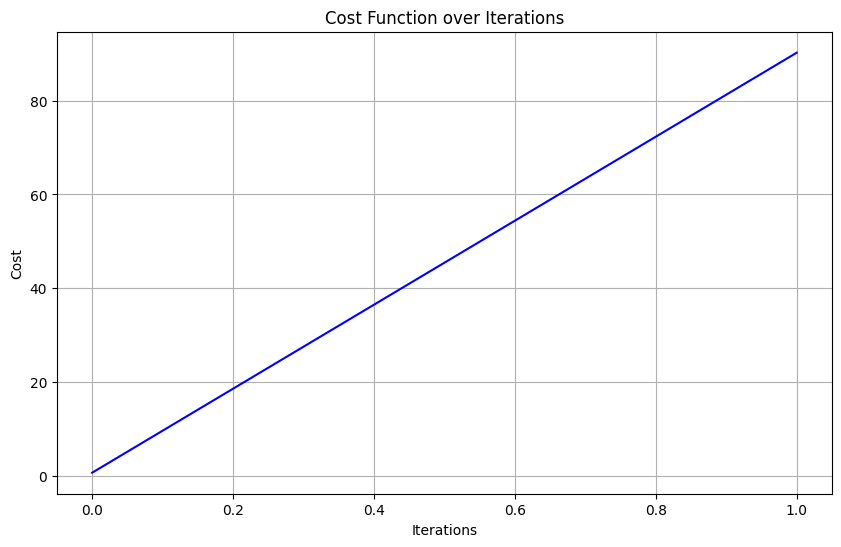

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

Final parameters (weights): [-0.47698718  0.05293071 -0.50527094 -1.00175055 -0.21034523 -0.20765248
 -0.0256286   0.22449404 -0.18144695]
Accuracy: 0.7877
Precision: 0.7500
Recall: 0.7297
F1 Score: 0.7397


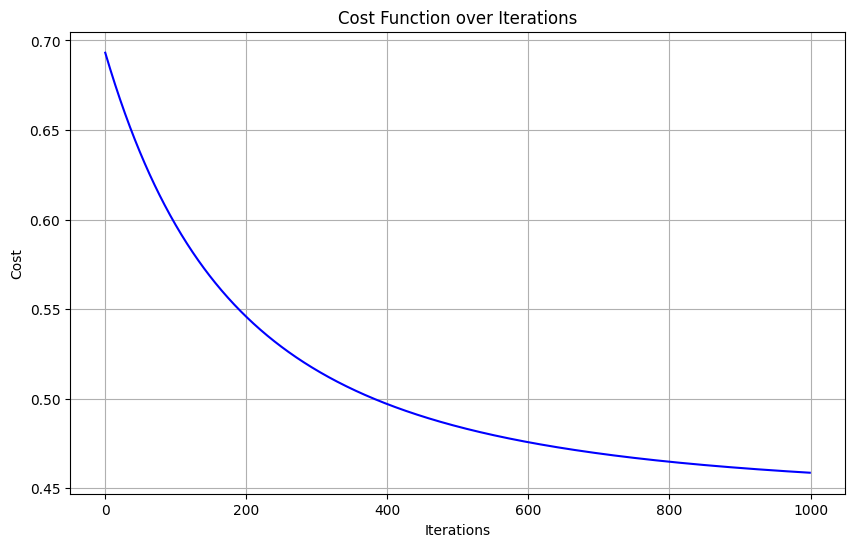

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('titanic.csv')

# Data Preprocessing
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Feature and target separation
X = data.drop(columns=['Survived'])
y = data['Survived']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000
cost_history = []

# Gradient Descent
for _ in range(iterations):
    z = np.dot(X_train, theta)
    predictions = sigmoid(z)

    errors = predictions - y_train
    cost = -np.mean(y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions))
    cost_history.append(cost)
    gradient = np.dot(X_train.T, errors) / len(y_train)
    theta -= learning_rate * gradient

# Predictions
y_pred_prob = sigmoid(np.dot(X_test, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Final parameters (weights): {theta}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the cost function
plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
